## Notebook for plotting results of Simulated Annealing

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
from statistics import mean
import os

%matplotlib inline 
matplotlib.style.use('ggplot')

In [2]:
def parseParamsFromName(fileName):
    folderName = ''
    n = ''
    for char in fileName:
        if not char.isdigit():
            folderName += char
        else:
            n += char
    return folderName, int(n)

In [3]:
def prepareDFCols(dirName, fileName):
    file_df = pd.read_csv(dirName + fileName)
    
    folderName, n = parseParamsFromName(fileName[:-4])
    
    file_df = file_df.assign(folderName=folderName)
    file_df = file_df.assign(n=n)
    
    return file_df

In [4]:
# load data from folder, create important columns and concat all files into 1 df
def loadDF(dirName):
    df = None
    
    for fileName in os.listdir(dirName):
        if df is None:
            df = prepareDFCols(dirName, fileName)
        else:
            df = pd.concat([df, prepareDFCols(dirName, fileName)], ignore_index=True)

    # make all ids positive
    df['KnapsackId'] = abs(df['KnapsackId'])
    return df

In [5]:
# definice pouzitelnych promennych
ROOT_FOLDER_NAME = './Output/'
ALGO_NAME = 'SimulatedAnnealing'

In [6]:
# ziskani pozadovanych dat
df = loadDF(ROOT_FOLDER_NAME + ALGO_NAME + '/')

display(df.head())

,KnapsackId,NumberOfItems,CpuTime,NodesVisited,Error,folderName,n
0,1,10,0.015625,0,1.0,NK,10
1,2,10,0.015625,0,1.0,NK,10
2,3,10,0.015625,0,0.0,NK,10
3,4,10,0.015625,0,0.0,NK,10
4,5,10,0.015625,0,0.0,NK,10


In [7]:
# load results.csv
res = pd.read_csv('results.csv')
for index, row in res.iterrows():
    folderName, n = parseParamsFromName(row['FileName'])
    res.loc[index, 'folderName'] = folderName
    res.loc[index, 'n'] = n
    
display(res.head())

,FileName,AlgoName,CpuTime,AvgRelativeError,Date,folderName,n
0,NK25,SimulatedAnnealing,45.312500,0.370027,2020-12-12,NK,25.0
1,NK15,SimulatedAnnealing,26.937500,0.327115,2020-12-12,NK,15.0
2,NK37,SimulatedAnnealing,74.843750,0.355967,2020-12-12,NK,37.0
3,NK27,SimulatedAnnealing,41.390625,0.363500,2020-12-12,NK,27.0
4,NK4,SimulatedAnnealing,2.906250,0.352000,2020-12-12,NK,4.0


In [8]:
res.n.unique()

array([25., 15., 37., 27.,  4., 10., 32., 22., 35., 40., 30., 20.])

In [9]:
np.asarray(df[(df['n'] == 4) & (df['folderName'] == 'NK')]['Error'], dtype=np.float).mean()

0.306

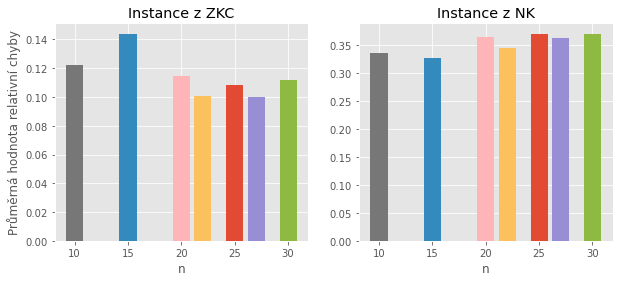

In [10]:
columnName = 'AvgRelativeError'
i = 121
plt.figure(figsize=(10,4))

# ZKC dataset
plt.subplot(i)
for n in res.n.unique():
    if n > 4 and n < 32:
        plt.bar(n,
                res[(res['n'] == n) & (res['folderName'] == 'ZKC')][columnName],
                width = 1.6
               )
plt.title('Instance z ZKC')
plt.xlabel('n')
plt.ylabel('Průměrná hodnota relativní chyby')
i += 1

# NK dataset
plt.subplot(i)
for n in res.n.unique():
    if n > 4 and n < 32:
        plt.bar(n,
                res[(res['n'] == n) & (res['folderName'] == 'NK')][columnName],
                width = 1.6
               )
plt.title('Instance z NK')
plt.xlabel('n')
i += 1

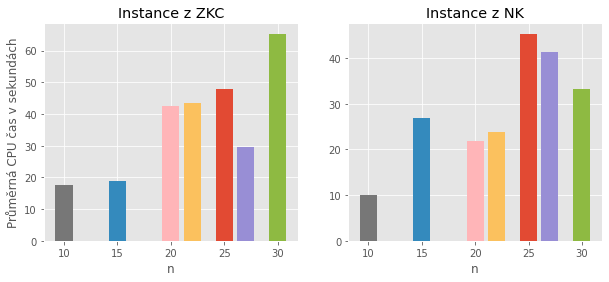

In [11]:
columnName = 'CpuTime'
i = 121
plt.figure(figsize=(10,4))

# ZKC dataset
plt.subplot(i)
for n in res.n.unique():
    if n > 4 and n < 32:
        plt.bar(n,
                res[(res['n'] == n) & (res['folderName'] == 'ZKC')][columnName],
                width = 1.6
               )
plt.title('Instance z ZKC')
plt.xlabel('n')
plt.ylabel('Průměrná CPU čas v sekundách')
i += 1

# NK dataset
plt.subplot(i)
for n in res.n.unique():
    if n > 4 and n < 32:
        plt.bar(n,
                res[(res['n'] == n) & (res['folderName'] == 'NK')][columnName],
                width = 1.6
               )
plt.title('Instance z NK')
plt.xlabel('n')
i += 1